Creación de un pipeline para clasificación de texto --- 3:48 min
===

* 3:48 min | Ultima modificación: Ocutbre 7, 2021 | [YouTube](https://youtu.be/2GkxWH45s3w)

https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html#sphx-glr-auto-examples-model-selection-grid-search-text-feature-extraction-py

Especificación del pipeline
---

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline(
    [
        # ---------------------------------------------------------------------
        # Convert a collection of text documents to a matrix of token counts.
        ("countVectorizer", CountVectorizer()),
        # ---------------------------------------------------------------------
        # Transform a count matrix to a normalized tf or tf-idf representation.
        ("tfidfTransformer", TfidfTransformer()),
        # ---------------------------------------------------------------------
        # Linear classifiers (SVM, logistic regression, etc.) with SGD training.
        ("sgdClassifier", SGDClassifier()),
    ]
)

Preparación de datos
---

In [2]:
from sklearn.datasets import fetch_20newsgroups

# categories = [
#     "alt.atheism",
#     "talk.religion.misc",
# ]

X_train, y_train = fetch_20newsgroups(
    subset="train",
    return_X_y=True,
)

X_test, y_test = fetch_20newsgroups(
    subset="test",
    return_X_y=True,
)

Búsqueda de hiperparámetros óptimos
---

In [3]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "countVectorizer__max_df": (0.5, 0.75, 1.0),
    "sgdClassifier__max_iter": (20,),
    "sgdClassifier__alpha": (0.00001, 0.000001),
    "sgdClassifier__penalty": ("l2", "elasticnet"),
}

gridSearchCV = GridSearchCV(
    pipeline,
    param_grid,
    n_jobs=-1,
)

gridSearchCV.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('countVectorizer',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                              

In [4]:
gridSearchCV.best_score_

0.9213367465626444

In [5]:
best_parameters = gridSearchCV.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print("{:>30s}: {:s}".format(param_name, repr(best_parameters[param_name])))

       countVectorizer__max_df: 0.75
          sgdClassifier__alpha: 1e-05
       sgdClassifier__max_iter: 20
        sgdClassifier__penalty: 'l2'


Evaluación
---

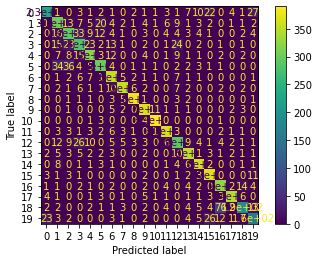

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = gridSearchCV.predict(X_test)

cm = confusion_matrix(
    y_true=y_test,
    y_pred=y_pred,
)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(20)).plot()